In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [65]:
df = pd.read_csv('D:/Data Science/Assignment/06Logistic regresion/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
y=df.iloc[:,-1].values
y

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#there is no missing value so no need of imputation

In [5]:
def range_x(x):
    return (np.min(x),np.max(x))
for i in range(1,12):
    print(df.columns[i],range_x(df.iloc[:,i]),end=' ')
     

job ('admin.', 'unknown') marital ('divorced', 'single') education ('primary', 'unknown') default ('no', 'yes') balance (-8019, 102127) housing ('no', 'yes') loan ('no', 'yes') contact ('cellular', 'unknown') day (1, 31) month ('apr', 'sep') duration (0, 4918) 

#All strings are covert in category

In [6]:
df.job = df.job.astype('category')
df.marital= df.marital.astype('category')
df.education = df.education.astype('category')
df.housing = df.housing.astype('category')
df.loan = df.loan.astype('category')
df.default= df.default.astype('category')
df.contact=df.contact.astype('category')
df.poutcome=df.poutcome.astype('category')

In [7]:
df=df.drop(columns=['y'],axis=1)

In [8]:
#find the dummy data
df=pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [12]:
#convert fame into array
x=df.values
x

array([[  58, 2143,    5, ...,    0,    0,    1],
       [  44,   29,    5, ...,    0,    0,    1],
       [  33,    2,    5, ...,    0,    0,    1],
       ...,
       [  72, 5715,   17, ...,    0,    1,    0],
       [  57,  668,   17, ...,    0,    0,    1],
       [  37, 2971,   17, ...,    1,    0,    0]], dtype=int64)

In [15]:
#encode the dataframe
le=LabelEncoder()
y = le.fit_transform(y)

In [20]:
#split the data into Train Data and Test Data and apply the scaller function
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)
sc_x=StandardScaler()
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)

In [27]:
#create the model
model = LogisticRegression(random_state=0)
model.fit(x_tr,y_tr)


LogisticRegression(random_state=0)

In [31]:
#predict the test data 
y_pr=model.predict(x_te)

In [56]:
#make cunfussion matrix
cm = confusion_matrix(y_te,y_pr)
cm

array([[7753,  227],
       [ 690,  373]], dtype=int64)

In [44]:
#check accuracy
accuracy_score(y_te,y_pr)

0.898595598805706

In [54]:
#actual VS predicted value
df1 = pd.DataFrame({'y_te':y_te,'y_pr':y_pr})
a=df1['y_te']==1
b=df1['y_pr']==1
df1[a & b]
df1[a]

,y_te,y_pr
1,1,1
26,1,1
30,1,0
37,1,0
41,1,0
...,...,...
9003,1,0
9028,1,0
9033,1,1
9038,1,0


In [55]:
#classification report 
print(classification_report(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0, 0.5, 'True Positive Rate')

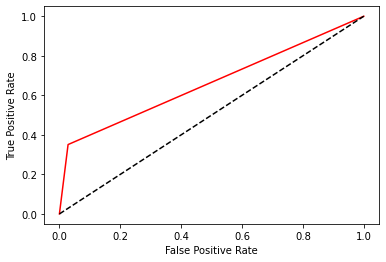

In [62]:
#Visulization 
fpr,tpr,threshold=roc_curve(y_te,y_pr)
auc= roc_auc_score(y_te,y_pr)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Accuracy is high but model perfoming poor to predict true defaulters. This is happan due to imbalanced data

now we build model using over sampling

In [66]:
y=df.iloc[:,-1].values
df1=df.drop(['y'],axis=1)

In [72]:
#get dummies and encode data frame
df1=pd.get_dummies(df1)
le=LabelEncoder()
y=le.fit_transform(y)
x=df1.values

In [75]:
ros = RandomOverSampler(random_state=0)
x_new,y_new=ros.fit_resample(x,y)

In [89]:
#split data and recreat the model using oversampling
x_tr,x_te,y_tr,y_te=train_test_split(x_new,y_new,test_size=0.2,random_state=0)
sc_x=StandardScaler()
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)
#create the training model
model1=LogisticRegression()
model1.fit(x_tr,y_tr)

LogisticRegression()

In [91]:
#predict the test data and classification report
y_pr=model1.predict(x_te)
print(classification_report(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      7901
           1       0.84      0.83      0.83      8068

    accuracy                           0.83     15969
   macro avg       0.83      0.83      0.83     15969
weighted avg       0.83      0.83      0.83     15969



In [92]:
#accuracy
accuracy_score(y_te,y_pr)

0.8328636733671488

Text(0, 0.5, 'True Positive Rate')

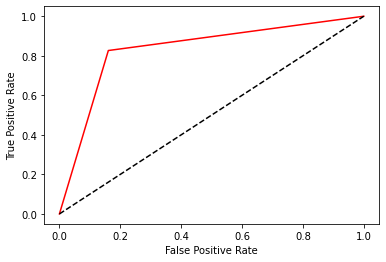

In [98]:
#data visulization

fpr,tpr,thresholds = roc_curve(y_te,y_pr)
auc=roc_auc_score(y_te,y_pr)
plt.plot(fpr,tpr,color='red',label ='logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [101]:
#confusion matrix
cm=confusion_matrix(y_te,y_pr)
cm

array([[6631, 1270],
       [1399, 6669]], dtype=int64)

In this model accuracy in goes down as compare to first model but it's predicts the both class with same accuracy. 
it predicts minority class with more accuratly this is more important than predict majority call prediction is more accurate.

model overall accuracy is also important so now we use "SMOTE" function to increse the accuracy

In [110]:
#SMOTE Function
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_new,y_new =smote.fit_resample(x,y)

In [112]:
#split data into Train And Test
x_tr,x_te,y_tr,y_te=train_test_split(x_new,y_new,test_size=0.2,random_state=0)
sc_x=StandardScaler()
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)

In [113]:
#creating the model
model1=LogisticRegression()
model1.fit(x_tr,y_tr)

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
#predict the model
y_pr = model1.predict(x_te)
print(classification_report(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7901
           1       0.97      0.92      0.94      8068

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969



In [115]:
#accuracy
print(accuracy_score(y_te,y_pr))

0.9435781827290375


Text(0, 0.5, 'True Positive Rate')

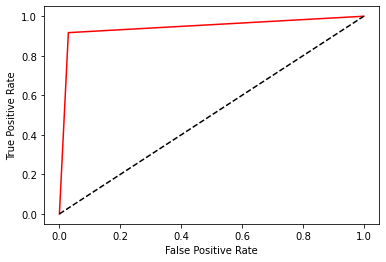

In [123]:
#visulization
fpr,tpr,threshold=roc_curve(y_te,y_pr)
auc= roc_auc_score(y_te,y_pr)
plt.plot(fpr,tpr,color='red',label='logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Using "SMOTE" function overall accuracy will incressed as well as F1 score of predicting true positives,i.e person subscribe the term deposit